In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import json
sys.path.append(os.environ["CODE_REPOSITORY"])
from snudda.utils.load_network_simulation import SnuddaLoadNetworkSimulation
from code_repository.extract_amplitude.extract_event_amplitude import extract_event_amplitude

In [2]:
network_path = os.path.join("networks", "ispn_network")
network_file = os.path.join(network_path, "network-synapses.hdf5")

In [3]:
mean_num_synapses = 3.2 # Mean number of synapses between dSPN-iSPN
voltage_correction = 1.125 # For Planert, experiment doen at -80 mV, simulations at -90 mV

In [4]:
simulations = dict()

In [5]:

for g in glob.glob(os.path.join(network_path, "simulation", "network-voltage.hdf5")):

    name = os.path.basename(g).split(".")[0]
    print(g)
    sns = SnuddaLoadNetworkSimulation(network_simulation_output_file=g, network_path=network_path)
    simulations.update({name : sns})
time = sns.get_time()    

networks/ispn_network/simulation/network-voltage.hdf5
Loading networks/ispn_network/simulation/network-voltage.hdf5


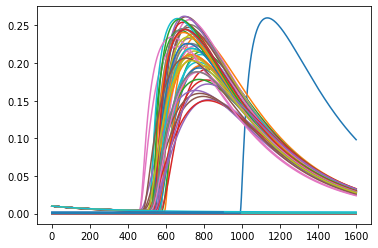

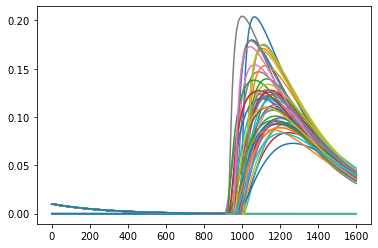

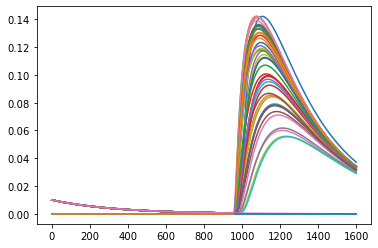

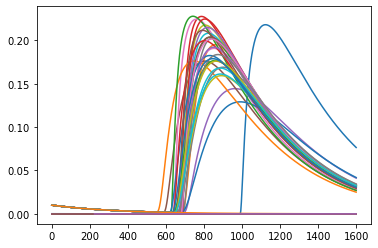

CPU times: user 4.87 s, sys: 1.25 s, total: 6.12 s
Wall time: 6.34 s


In [6]:
%%time
amplitudes = dict()
for r, k in enumerate(simulations.keys()):
    for cell_no in range(4):


        v= sns.get_voltage(cell_no).T[0]
        start = 3000
        m = np.mean(v[start:3500])*1e3

        a = extract_event_amplitude(v[start:]*1e3 - m, threshold=0.01, interval=40)
        amplitudes.update({cell_no : a })

In [8]:
mean = np.mean([np.abs(a[0:60]) for n, a in amplitudes.items()]) 

In [9]:
print(f" Mean amplitude of single synapse {mean/voltage_correction} mV")

 Mean amplitude of single synapse 0.10269928681549371 mV


In [10]:
print(f" Mean amplitude of single synapse {(mean * mean_num_synapses)/voltage_correction} mV")

 Mean amplitude of single synapse 0.3286377178095799 mV


In [ ]:
%%time
for cell_no in range(4):
    
    
    for r, k in enumerate(simulations.keys()):
        sns = simulations[k]
        
        vs = sns.get_voltage(cell_no).T
        v = vs[0]
        plt.figure()
        plt.title(f"{sns.get_neuron_name([cell_no])} at soma")
        start = 3000
        
        m = np.mean(v[start:3500])*1e3
        plt.plot(time[start:]*1e3,v[start:]*1e3 - m)  
plt.show()

In [ ]:
%%time
for cell_no in range(4):
    
    
    for r, k in enumerate(simulations.keys()):
        sns = simulations[k]
        
        vs = sns.get_voltage(cell_no).T
        sec_id = sns.network_simulation_file['neurons'][str(cell_no)]['voltage']['sec_id'][()]
        for i, v in enumerate(vs):
            plt.figure()
            plt.title(f"{sns.get_neuron_name([cell_no])} at sec id {sec_id[i]}")
            plt.plot(time*1e3,v)  
plt.show()